# Section 2: Datasets

The dataset used by a machine learning algorithm is fundamental to the process of learning, once that all algorithm is going to be based on the samples presented (train set) to take a decision according to the task to be performed. In this course, we defined that a dataset can be available in three in three formats:

* **Raw Data:** raw data are available the same way they were collected. For example: PE executables, ELF or APK packages;
* **Attributes:** filtered metadata extracted from the raw data with less noise and focus on the data that really matters. For example: CSV with metadata, execution logs of a sofware or data extracted from its header;
* **Features:** features extracted from the attributes or raw data ready to be used in a classifier. For example: feature vectors extracted from the attributes collected before.

With these definitions in mind, we will introduce how to correctly collect and label data, as well as present two dataset examples.

## Collecting Data

The data collection can be one of the most challenging steps of a project, once every problem is going to be based on this data and can change a lot according to the problem domain and their origin. Many times, data can be from a very sensible source that do not allow them to be shared or used somehow, which can affect the reproducibility of a solution. If the data is personal or restricted, keep their privacy is mandatory (we encourage the use of differential privacy techniques in these cases [Dwork and Roth 2014]). Thus, we strongly recommend to collect the most amount of useful information as possible (those that tend to differ a class from another), in a way that they takes up as little disk space possible (which can be a limitation). An important information that must be collected is the time stamp of a sample (first seen date, collection date, development date, etc): data related to security usually does not belong to a stationary distribution, i.e., they do not have always the same distribution and are frequently changing to evade security solutions or to adapt to hardware and software updates [Ceschin et al. 2018]. Further, we will investigate some problems related to data collection.

## Labeling Data

According to the problem domain, labeling data can be difficult. Particularly, problems involving malware are challenging, given that their labels are based on anti virus engines that use signature detection and much of the times does not have the right label when a treat is just found (it is just labeled as a threat to be detected, but generally it is not classified correctly in its family since the beginning). This fact can affect the remediation of an attack, since that depending on the malware family, different actions can be taken to restore the system to a normal state again. Due to that, we strongly recommend to use [VirusTotal API](https://developers.virustotal.com/reference) when labeling malicious programs, together with [AVClass tool](https://github.com/malicialab/avclass) [Sebastián et al.
2016]. VirusTotal allows you to obtain a complete report of a certain sample, with the results of each anti virus engine of the platform. The code below presents an example of how to get a report using the API (you need to provide your own API key to work).

In [1]:
import requests, json
# virus total report api
url = 'https://www.virustotal.com/vtapi/v2/file/report'
# api key (change it to yours)
API_KEY = "<api_key>"
# parameters: apikey is your apikey; resource is the file md5/sha1/sha256
params = {'apikey': API_KEY, 'resource': '6545c6f328393f9b3168e260ae1b7135c1bfa917'}
# send request and get response
response = requests.get(url, params=params)
# write response in a json file
with open('samples.json', 'w') as outfile:
json.dump(response.json(), outfile)
# print output
print(response.json())

{'md5': 'ab243d1fad9ed1af747f313ec88b3fd0',
 'permalink': 'https://www.virustotal.com/file/6c7a2a4dae13df742a60c0fe3c1d319eaeb6f10eb63a10ea3cce234bbdc08c9e/analysis/1521947751/',
 'positives': 48,
 'resource': '6545c6f328393f9b3168e260ae1b7135c1bfa917',
 'response_code': 1,
 'scan_date': '2018-03-25 03:15:51',
 'scan_id': '6c7a2a4dae13df742a60c0fe3c1d319eaeb6f10eb63a10ea3cce234bbdc08c9e-1521947751',
 'scans': {'ALYac': {'detected': True,
   'result': 'Trojan.ScriptKD.4189',
   'update': '20180325',
   'version': '1.1.1.5'},
  'AVG': {'detected': True,
   'result': 'FileRepMalware',
   'update': '20180325',
   'version': '18.2.3827.0'},
  'AVware': {'detected': True,
   'result': 'Trojan.Win32.Meredrop',
   'update': '20180325',
   'version': '1.5.0.42'},
  'Ad-Aware': {'detected': True,
   'result': 'Trojan.ScriptKD.4189',
   'update': '20180325',
   'version': '3.0.3.1010'},
  'AegisLab': {'detected': True,
   'result': 'Troj.W32.Agent!c',
   'update': '20180325',
   'version': '4.2'}

After saving all the reports in a file (in our case, "*samples.json*"), clone [AVClass repository](https://github.com/malicialab/avclass) and execute the following command:

> ./avclass_labeler.py -vt samples.json -v -fam > samples.labels

This is going to create three files:
* **samples.verbose**: created due to the parameter *-v*, which contains all families extracted for each sample ranked by the number of AV engines that use that family;
* **samples.families**: created due to the parameter *-fam*, which contains a ranking of the families assigned to the input samples;
* **samples.labels**: created as output, which contains the corresponding family of each input sample.

With the output file created, it is possible to relate it to the original files to obtain the corresponding malware family of each sample, "normalizing" the results generated by VirusTotal.

## Problems

When collecting data to create a dataset, we are prone to a diversity of problems that can directly affect the quality of the produced results. Here we list some of them: 

* **Insuficient Data:** sometimes the amount of data collected may not be enough for the machine learning model to generalize the problem. For complex problems, such as image or speech recognition, millions of images may be needed [Gron 2017].
* **Non-Representative Data:** it is important that the collected data represent the problem, including new cases that must be generalized. Otherwise, the classification can present bad results, especially when applied in the real world [Gron 2017]. For example, consider a very specific type of attack that only happens in a certain country, such as [brazillian boleto](https://securelist.com/attacks-against-boletos/66591/). If you these malware to prevent attacks in USA, they do not represent the real scenario where the solution is being used.
* **Poor Quality Data:** data with error, outliers and noise make the problem of identifying patterns even more challenging, decreasing the classification performance [Gron 2017].
* **Irrelevant Attributes:** a machine learning system will be able to learn through relevant attributes and features, i.e., those that can effectively differ a class from other. There is no secret: if there is garbage in the input, any machine learning algorithm will have garbage as output (known as garbage in, garbage out) [Gron 2017]. That is why feature selection is as important as the feature extraction and the classification algorithm.
* **Lack of Classes:** the lack of classes can be a problem according to the source of the collected data: sometimes they are filtered (and do not represent the real problem) or even part of the classes does not appear where the data was collected. For example, if the data was collected in a country where a type of attack does not happen and the solution is going to be used in another country where it does, there will be no sample from that class to train a model and predict future threats.
* **Class Imbalance:** very common in security problems, once certain types of attacks happen more frequently than others, a problem for the classifier (that may not generalize enough the less prevalent classes and has a bias in favor of the most prevalent ones).
* **Delayed Classes:** the class of a given sample may not be available right after it was collected, affecting the classifier update when collecting new data, once it can only check if it classified correctly a sample just when its class is available.

## Examples

In this course we are going to use two datasets that were already used previously in the malware classification literature [Arp et al. 2014, Ceschin et al. 2018], one containing Windows software and another, Android. Both are in the CSV format and already have the extracted attributes from the collected data (the first one collected by us and the second, improved with temporal information of each sample, a crucial information to correctly evaluate a machine learning solution applied to security).

### Brazilian Malware

The Brazilian Malware dataset contains attributes from 50,181 samples of goodware and malware (for Windows, Portable Executable - PE) collected during 2013 and 2019 (21,116 goodware and 29,065 malware). The goodware samples were collected using a web crawler from three download websites, such as [Sourceforge](https://sourceforge.net/), [Softonic](https://en.softonic.com/) and [CNET Downloads](https://download.cnet.com/windows/). The malware samples were obtained from a Brazilian financial institution that prefers to remains anonymous, which collected them using security mechanisms installed in their clients or were obtained from phishing. Until the moment of this work, about 50GB of binaries were collected, however, as malware distribution is not allowed in Brazil, the dataset could only be made available in a CSV file containing their (static) attributes. Besides the SHA1 hash of each sample, the dataset contains the PE header information (similar to the one presented in [section 3](03_attributes.ipynb)), as well as the file entropy, imported libraries and functions, and the list of compilers, packers or tools used by each sample.

Here we read the dataset using pandas:

In [2]:
import pandas as pd
# dataset location
data_path = "./datasets/brazilian-malware.csv"
# read CSV dataset
data = pd.read_csv(data_path)

We can see the shape of the data: 50,181 samples and 28 attributes.

In [3]:
data.shape

(50181, 28)

Using matplotlib, we plot the distribution by classes of the dataset:

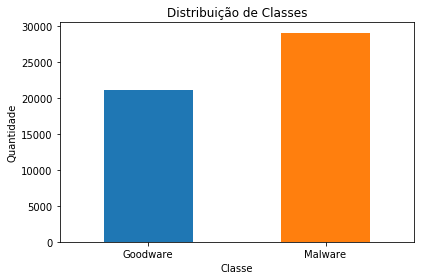

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# group data by label and create a bar plot
ax = data['Label'].groupby(
     data["Label"]).count().plot(kind="bar")
# set x label
ax.set_xlabel("Classe")
# set y label
ax.set_ylabel("Quantidade")
# set x tick labels and set it in horizontal position
ax.set_xticklabels(["Goodware", "Malware"], rotation='horizontal')
# set plot title
ax.set_title("Distribuição de Classes")
# savefig and show plot
fig.tight_layout()
plt.savefig("distribution_brmw.pdf")
plt.show()

Now we transform the column "FirstSeenDate", which is the sample first appearence date in VirusTotal, into datetime and then sort the data:

In [5]:
data['FirstSeenDate'] =  pd.to_datetime(data['FirstSeenDate'])
data = data.sort_values(by='FirstSeenDate')

Show data:

In [6]:
data

,BaseOfCode,BaseOfData,Characteristics,DllCharacteristics,Entropy,FileAlignment,FirstSeenDate,Identify,ImageBase,ImportedDlls,...,PointerToSymbolTable,SHA1,Size,SizeOfCode,SizeOfHeaders,SizeOfImage,SizeOfInitializedData,SizeOfOptionalHeader,SizeOfUninitializedData,TimeDateStamp
0,4096,69632,783,0,5.981249,512,1970-01-01,powerbasic/win 8.00,4194304,comdlg32.dll gdi32.dll kernel32.dll ole32.dll ...,...,0,b0068836a40e6a43c6b546fcb709237e5aa223d1,76288,64855,1024,86016,2560,224,1500,12345
1,4096,1851392,783,0,6.081747,512,1970-01-01,NaN,4194304,comctl32.dll comdlg32.dll gdi32.dll kernel32.d...,...,0,5741708cd785f13b44267883e3f2fd2fa51fc23f,2558464,1843888,1024,2600960,500348,224,21476,0
2,4096,40960,783,0,5.586422,512,1970-01-01,NaN,4194304,comdlg32.dll kernel32.dll msvcrt.dll msvcrt.dl...,...,0,507fe5d8244f33d29d427468efca4ce406f23666,178688,33792,1024,33759232,177664,224,33557504,0
3,1359872,2138112,783,0,7.969464,512,1970-01-01,"upx 2.93 - 3.00 [lzma] -> markus oberhumer, la...",4194304,kernel32.dll advapi32.dll comdlg32.dll gdi32.d...,...,0,e51a7811464be1acadf6e72ba3a66aba0da438cd,806816,778240,4096,2166784,28672,224,1355776,0
4,4096,40960,783,32768,7.999900,512,1970-01-01,NaN,4194304,advapi32.dll comctl32.dll gdi32.dll kernel32.d...,...,0,0e046d9903c313ffeeb0d6392335437fe881b1f5,50689096,35840,1024,303104,38912,224,110080,0
5,192512,245760,783,0,7.328245,512,1970-01-01,upx v0.89.6 - v1.02 / v1.05 - v1.22 upx v0.80 ...,4194304,kernel32.dll advapi32.dll comctl32.dll comdlg3...,...,0,19de46452aca94ad64c28a265ab837e79fe9e588,76800,53248,4096,270336,24576,224,188416,12345
6,8192,61440,33166,0,6.257786,512,1970-01-01,NaN,4194304,kernel32.dll user32.dll,...,0,f6e0452325d7d325d802fbb1aa367cec50c37a03,69660,52224,1024,147456,77824,224,0,0
7,4096,40960,775,0,5.308237,512,1970-01-03,NaN,4194304,lua53.dll kernel32.dll msvcrt.dll msvcrt.dll,...,75264,56e362bc399f7f2e5beb8ef8ed7b7198d8488461,110146,34304,1024,102400,74240,224,3072,196608
8,4096,40960,775,0,5.256822,512,1970-01-03,NaN,4194304,lua53.dll kernel32.dll msvcrt.dll msvcrt.dll,...,73728,01a8b85f2835190a4f3066e4ed3d4555788f4ccb,107962,34304,1024,98304,72704,224,3072,196608
9,4096,131072,775,0,5.909817,512,1970-01-04,NaN,4194304,kernel32.dll msvcrt.dll msvcrt.dll,...,194560,1bad4f17d48cfc6f0a15759df5e545e161c4b01b,246187,123392,1024,225280,193536,224,3072,327680


### Drebin

The Drebin dataset was originally available in 2014, presenting a solution for malware detection in the device itself, with a detection rate of 94% and low false positive rate, taking about ten seconds, in average, to analyze an application [Arp et al. 2014]. The dataset contains static attributes extracted (very similar to the methodology presented in [section 3](03_attributes.ipynb)) from 129,013 Android applications coolected from 2010 and 2012, in which 5,560 are malware and 123,453, goodware. Since the original dataset did not have temporal information, we improved it including these information from VirusTotal, considering that the date of a sample is its first seen date in the system. This assumption created an inconsistency because some samples already appeared before in VirusTotal (2009) and some others, just after (2013 and 2014).

Below, an example of how to read drebin dataset using pandas:

In [7]:
import pandas as pd
# dataset location
data_path_2 = "./datasets/drebin-drift.csv"
# read CSV dataset
data_drebin = pd.read_csv(data_path_2)

Shape of data (129,013 samples with 14 attributes):

In [8]:
data_drebin.shape

(129013, 14)

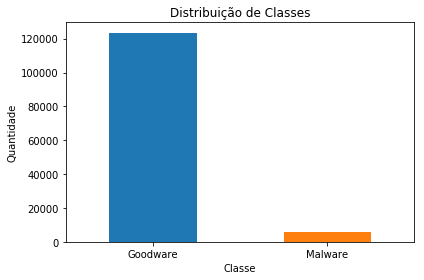

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# group data by label and create a bar plot
ax = data_drebin['label'].groupby(
     data_drebin["label"]).count().plot(kind="bar")
# set x label
ax.set_xlabel("Classe")
# set y label
ax.set_ylabel("Quantidade")
# set x tick labels and set it in horizontal position
ax.set_xticklabels(["Goodware", "Malware"], rotation='horizontal')
# set plot title
ax.set_title("Distribuição de Classes")
# savefig and show plot
fig.tight_layout()
plt.savefig("distribution_drebin.pdf")
plt.show()

Show data:

In [10]:
data_drebin

,sha256,submission_date,api_call,permission,url,provider,feature,intent,activity,call,service_receiver,real_permission,label,family
0,a44a4856e27a0f8448a12f445b46d9430b93fd15414b04...,2009-06-08 02:21:25,android/media/MediaPlayer->start android/app/A...,android.permission.VIBRATE,NaN,NaN,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,NaN,android.permission.INTERNET android.permission...,0,goodware
1,05ffa80882edba811018e95e0284b1b77f36a5e0a85236...,2009-06-08 02:25:49,android/media/MediaPlayer->stop android/os/Vib...,android.permission.VIBRATE android.permission....,NaN,NaN,android.hardware.touchscreen android.hardware....,android.intent.action.MAIN android.intent.cate...,.GloftMPL2,getSystemService,NaN,android.permission.MODIFY_AUDIO_SETTINGS andro...,0,goodware
2,788411a922a37bdd731902272a2e22530bea75d6d44bc9...,2009-06-08 02:29:07,android/media/MediaPlayer->start android/app/A...,NaN,NaN,NaN,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,NaN,android.permission.INTERNET android.permission...,0,goodware
3,2333f5dcc54a3332dfe0414eb97cddddc8307ee829c47b...,2009-06-08 02:29:15,android/media/MediaPlayer->start android/os/Vi...,android.permission.VIBRATE android.permission....,NaN,NaN,android.hardware.touchscreen android.hardware....,android.intent.action.MAIN android.intent.cate...,.GloftORTR,getSystemService,NaN,android.permission.MODIFY_AUDIO_SETTINGS andro...,0,goodware
4,0b4094ec8c1c6a7e03881e4c49f1bbd8510e0f3c818cca...,2009-07-18 23:29:00,java/lang/Runtime->exec,android.permission.ACCESS_SUPERUSER,NaN,NaN,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.ScreenshotActivity,Execution of external commands,NaN,android.permission.READ_LOGS,0,goodware
5,6825e28c96a53956bfc557a160249468cec98943aacd37...,2009-07-27 19:42:43,android/os/Vibrator->vibrate android/content/C...,android.permission.INTERNET android.permission...,codify.se codify.se codify.se codify.se codify...,NaN,android.hardware.touchscreen android.hardware....,android.intent.action.MAIN android.intent.cate...,.StartUpActivity se.illusionlabs.labyrinth.ful...,printStackTrace getSystemService,NaN,android.permission.INTERNET android.permission...,0,goodware
6,473339c3ad39321ea0d22e922fd1518da8bdce6cb36c46...,2009-07-28 20:46:02,NaN,NaN,NaN,NaN,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.LunarLander,NaN,NaN,NaN,0,goodware
7,c224c5000240f9d477aadc31846413482ef3c3e2a15cc8...,2009-09-05 10:23:30,java/net/HttpURLConnection android/content/Con...,android.permission.READ_CONTACTS android.permi...,googleapis.com googleapis.com,NaN,android.hardware.touchscreen,android.intent.action.PICK android.intent.acti...,TranslateActivity .TranslateActivity HistoryAc...,getSystemService,Translate,android.permission.INTERNET android.permission...,0,goodware
8,10e8e4613e1173563f4cd1c7578cbbec8d29c168bda84c...,2009-10-04 15:54:26,android/telephony/TelephonyManager->getDeviceI...,android.permission.READ_PHONE_STATE android.pe...,NaN,NaN,android.hardware.touchscreen android.hardware....,android.intent.category.DEFAULT android.intent...,TagIt TagInfo TagList TagItNoMatch About Home ...,getDeviceId getPackageInfo getSystemService Ob...,NaN,android.permission.RECORD_AUDIO android.permis...,0,goodware
9,c2f726199e35cc9d4817093dd112dd81832bfd1bb323f1...,2009-10-05 16:39:10,android/os/Vibrator->cancel,android.permission.VIBRATE android.permission....,hiapk.com hiapk.com,android.provider.Telephony.SMS_RECEIVED,android.hardware.touchscreen android.hardware....,android.intent.action.MAIN android.intent.cate...,.Puke,getSystemService,com.reyoung.puke.game.sms.sms_receive,android.permission.VIBRATE,0,goodware


## References

[Arp et al. 2014] Arp, D., Spreitzenbarth, M., Hubner, M., Gascon, H., and Rieck, K.
(2014). Drebin: Effective and explainable detection of android malware in your pocket.
In NDSS.

[Ceschin et al. 2018] Ceschin, F., Pinage, F., Castilho, M., Menotti, D., Oliveira, L. S.,
and Gregio, A. (2018). The need for speed: An analysis of brazilian malware classifers.
IEEE Security Privacy, 16(6):31–41.

[Dwork and Roth 2014] Dwork, C. and Roth, A. (2014). The algorithmic foundations of
differential privacy. Found. Trends Theor. Comput. Sci., 9(3&#8211;4):211–407.

[Gron 2017] Gron, A. (2017). Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly Media, Inc., 1st edition.

[Sebastián et al. 2016] Sebastián, M., Rivera, R., Kotzias, P., and Caballero, J. (2016).
Avclass: A tool for massive malware labeling. In Monrose, F., Dacier, M., Blanc, G.,
and Garcia-Alfaro, J., editors, Research in Attacks, Intrusions, and Defenses, pages
230–253, Cham. Springer International Publishing.